<a href="https://colab.research.google.com/github/RamadaniOktavia/DIF62130_B_25_2311533002/blob/main/Praktikum5/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print(f'Number of samples: {n_samples}')
print(f'Number of features: {n_features}')

Number of samples: 150
Number of features: 4


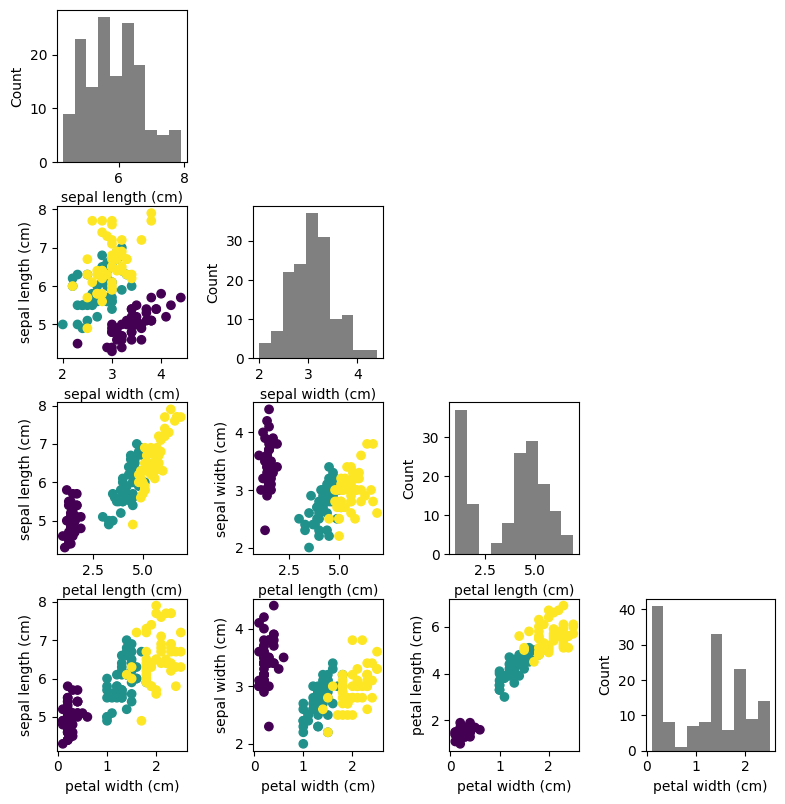

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize=(8, 8))
fig.tight_layout()

names = iris.feature_names

for i, j in zip(*np.triu_indices_from(ax, k=1)):
    ax[j, i].scatter(X[:, j], X[:, i], c=y)
    ax[j, i].set_xlabel(names[j])
    ax[j, i].set_ylabel(names[i])
    ax[i, j].set_axis_off()

for i in range(n_features):
  ax[i, i].hist(X[:, i], color = 'grey')
  ax[i, i].set_ylabel('Count')
  ax[i, i].set_xlabel(names[i])

In [ ]:
def mean(x): # np.mean(X, axis = 0)
  return sum(x)/len(x)
def std(x) :  # np.std(X, axis = 0)
  return (sum((x - mean(x))**2 for i in x)/len(x))**0.5
def Standardize_data(X):
  return (X - mean(X))/std(X)
X_std = Standardize_data(X)

In [ ]:
print(X)
print(X_std)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
def covariance(x):
  return (x.T @ x)/(x.shape[0]-1)
cov_mat = covariance(X_std.T) # np.cov(X_std.T)

In [ ]:
cov_mat

array([[ 1.33333333,  0.66666667,  1.33333333, ..., -1.33333333,
        -0.66666667, -1.33333333],
       [ 0.66666667,  1.33333333,  0.66666667, ..., -0.66666667,
        -1.33333333, -0.66666667],
       [ 1.33333333,  0.66666667,  1.33333333, ..., -1.33333333,
        -0.66666667, -1.33333333],
       ...,
       [-1.33333333, -0.66666667, -1.33333333, ...,  1.33333333,
         0.66666667,  1.33333333],
       [-0.66666667, -1.33333333, -0.66666667, ...,  0.66666667,
         1.33333333,  0.66666667],
       [-1.33333333, -0.66666667, -1.33333333, ...,  1.33333333,
         0.66666667,  1.33333333]])

In [ ]:
from numpy.linalg import eig

#Eigendecomposition of covarince matrix
eig_vals, eig_vecs = eig(cov_mat)

#Adjusting the eigenvectors (loadings) that are largest in absolute valueto be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis, :]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [ 1.38936124e+02+0.00000000e+00j  4.30260764e+01+0.00000000e+00j
  1.47608561e+01+0.00000000e+00j  3.27694323e+00+0.00000000e+00j
  8.11791702e-15+0.00000000e+00j  5.85267068e-15+4.06734718e-15j
  5.85267068e-15-4.06734718e-15j -2.78730325e-15+5.19127343e-15j
 -2.78730325e-15-5.19127343e-15j -5.80179708e-15+0.00000000e+00j
 -4.87138621e-15+2.93738068e-15j -4.87138621e-15-2.93738068e-15j
  1.10468403e-15+5.45375223e-15j  1.10468403e-15-5.45375223e-15j
 -1.55566874e-15+4.98345428e-15j -1.55566874e-15-4.98345428e-15j
  4.03204506e-15+3.60143400e-15j  4.03204506e-15-3.60143400e-15j
 -5.03978938e-15+0.00000000e+00j -4.52093235e-15+0.00000000e+00j
  2.48563397e-15+3.76665900e-15j  2.48563397e-15-3.76665900e-15j
  4.00251383e-15+1.83119065e-15j  4.00251383e-15-1.83119065e-15j
 -1.81433785e-15+3.76396018e-15j -1.81433785e-15-3.76396018e-15j
 -3.05859337e-15+1.94402350e-15j -3.05859337e-15-1.94402350e-15j
  3.85243328e-15+0.00000000e+00j -3.36481861e-15+0.00000000e+00j
 -1.0763581

In [ ]:
# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

#Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

#For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(np.float64(138.93612428550136), array([ 0.0960221 -0.j,  0.06354876-0.j,  0.0960221 -0.j,  0.0960221 -0.j,
        0.0960221 -0.j,  0.0960221 -0.j,  0.0960221 -0.j,  0.0960221 -0.j,
        0.06354876-0.j,  0.0960221 -0.j,  0.0960221 -0.j,  0.0960221 -0.j,
        0.06354876-0.j,  0.06354876-0.j,  0.0960221 -0.j,  0.0960221 -0.j,
        0.0960221 -0.j,  0.0960221 -0.j,  0.0960221 -0.j,  0.0960221 -0.j,
        0.0960221 -0.j,  0.0960221 -0.j,  0.0960221 -0.j,  0.0960221 -0.j,
        0.0960221 -0.j,  0.06354876-0.j,  0.0960221 -0.j,  0.0960221 -0.j,
        0.0960221 -0.j,  0.0960221 -0.j,  0.0960221 -0.j,  0.0960221 -0.j,
        0.0960221 -0.j,  0.0960221 -0.j,  0.0960221 -0.j,  0.0960221 -0.j,
        0.0960221 -0.j,  0.0960221 -0.j,  0.06354876-0.j,  0.0960221 -0.j,
        0.0960221 -0.j,  0.06354876-0.j,  0.0960221 -0.j,  0.0960221 -0.j,
        0.0960221 -0.j,  0.06354876-0.j,  0.0960221 -0.j,  0.0960221 -0.j,
        0.0960221 -0.j,  0.0960221 -0.j, -0.06354876+0.j, -0.06354

In [ ]:
# Select top k eigenvectors
k = 2
W = eig_vecs_sorted[:k,:] # Projection matrix

print(W.shape)

(2, 150)


In [ ]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i/eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()